# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Alton Wong

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = yellowbrick.datasets.loaders.load_concrete(data_home = None, return_dataset = False)

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)
tree = DecisionTreeRegressor(max_depth= 5, random_state= 0).fit(X_train, y_train)
forest = RandomForestRegressor(max_depth= 5, random_state= 0).fit(X_train, y_train)
gradient = GradientBoostingRegressor(max_depth= 5, random_state= 0).fit(X_train, y_train)

models = {'Decision Tree': tree, 'Random Forest': forest, 'GradientBoostingRegressor': gradient}
results = {"Training accuracy":[],"Validation accuracy":[]}
for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv= 5, scoring= 'neg_mean_squared_error',return_train_score= True)
    train_mse = (-1)*np.mean(scores['train_score'])
    test_mse = (-1)*np.mean(scores['test_score'])
    results["Training accuracy"].append(train_mse)
    results["Validation accuracy"].append(test_mse)
    results_df = pd.DataFrame(results)

results_df.index = ["Decision Tree", "Random Forest", "GradientBoostingRegressor"]
print(results_df)
   

    


                           Training accuracy  Validation accuracy
Decision Tree                      47.279761            73.447331
Random Forest                      29.577455            45.059351
GradientBoostingRegressor           3.379440            22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [4]:
# TO DO: ADD YOUR CODE HERE
models = {'Decision Tree': tree, 'Random Forest': forest, 'GradientBoostingRegressor': gradient}
results = {"Training accuracy":[], "Validation accuracy":[]}
for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv= 5, scoring= 'r2',return_train_score= True)
    train_r2 = np.mean(scores['train_score'])
    test_r2 = np.mean(scores['test_score'])
    results["Training accuracy"].append(train_r2)
    results["Validation accuracy"].append(test_r2)
    results_df = pd.DataFrame(results)

results_df.index = ["Decision Tree", "Random Forest", "GradientBoostingRegressor"]
print(results_df)


                           Training accuracy  Validation accuracy
Decision Tree                       0.834465             0.738697
Random Forest                       0.896557             0.840927
GradientBoostingRegressor           0.988171             0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

From assignment 2, the scores calculated from linear regression are:      

Training accuracy  Validation accuracy

MSE             111.358439               95.904136

R2                0.610823                 0.623414

Compaing the results above to the results achieved from decision tree regression, random forest regression, and gradient boostingregressor. The tree-based regression models used yielded better results compared to the linear regression used in A2. The MSE scores are lower, and the R2 scores are higher. 

The gradient boosting regressor would be the best choice as it yielded the best results (lowest MSE and highest R2 score).

One way to increase the accuracy would be to play around with the maximum depth of the tree, but that requires some fine tuning as you don't want to overfit or underfit the model. Another way to increase the accuracy would be to increase the n_estimators in both the random forest and gradient boosting regressor.




### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

For part 1 of the assignment I referred back to the python examples shown in class as well as in the lab.  I also referred to the sklearn website for the decision tree regressors, and all the parameters involved. 
I did not have to use generative AI for this portion of the assignment.
The biggest challenge was figuring out how to use cross_validate and which sets of data to use.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset
def load_wine():
    'Load wine data. It will be downloaded from https://archive.ics.uci.edu/dataset/109/wine.'
    
    import os
    import requests

    file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    file_name = file_url.split('/')[-1]

    if not os.path.isfile(file_name):
        print('Downloading from{}'.format(file_url))
        r = requests.get(file_url)
        with open(file_name,'wb') as output_file:
            output_file.write(r.content)

    data = pd.read_csv(file_name, na_values = '?', names=['class', 'Alchol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline'])
    

    return data

data = load_wine()
X = data.drop("class", axis = 1)
y = data["class"]
print(f"Size of X is: {X.size}, and type of X is: {type(X)}")
print(f"Size of y is: {y.size}, and type of y is: {type(y)}")
# print(X.shape)
# print(y.shape)



Size of X is: 2314, and type of X is: <class 'pandas.core.frame.DataFrame'>
Size of y is: 178, and type of y is: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
data.head()

,class,Alchol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE
missing_value = X.isnull().sum().sum()+y.isnull().sum()
print(f"There are {missing_value} missing values in the dataset")

There are 0 missing values in the dataset


How many samples do we have of each type of wine?

In [18]:
# TO DO: ADD YOUR CODE HERE
wine_count = y.value_counts()
print(f"There are:\n {wine_count} \ntypes of wine")

There are:
 class
2    71
1    59
3    48
Name: count, dtype: int64 
types of wine


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [19]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state= 0)

svc = SVC(random_state= 0).fit(X_train, y_train)
tree = DecisionTreeClassifier(max_depth= 3, random_state= 0).fit(X_train, y_train)

model = {"SVC": svc, "DecisionTreeClassifier": tree}
results = {"Training accuracy":[], "Validation accuracy":[]}


for name, model in model.items():
    scores = cross_validate(model, X_train, y_train, cv= 5, scoring= 'accuracy',return_train_score= True)
    cv_train = np.mean(scores["train_score"])
    cv_test = np.mean(scores["test_score"])
    results["Training accuracy"].append(cv_train)
    results["Validation accuracy"].append(cv_test)
    results_df = pd.DataFrame(results)

results_df.index = ['SVC', 'DecisionTreeClassifier']
print(results_df)
    
    


                        Training accuracy  Validation accuracy
SVC                              0.680427             0.676638
DecisionTreeClassifier           0.994357             0.894017


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [10]:
# TO DO: Implement best model
#Based off results_df, assume DecisionTreeClassifier is the best
model1 = tree


Text(170.97222222222223, 0.5, 'True value')

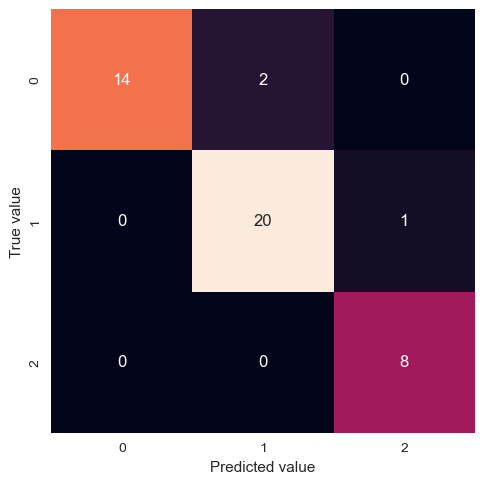

In [11]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix, classification_report
mat = confusion_matrix(y_val, model1.predict(X_val))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

In [12]:
# TO DO: Print classification report
print(classification_report(y_val, model1.predict(X_val)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

The training and validation accuracy differ a lot between the two methods used. The decision tree classifier has much higher accuracy scores for both the training(0.994357) and testing(0.894017) set. Whereas the SVC method yielded values of 0.680427 for training and 0.676638 for testing. 

Two reasons why the SVM did not work is well is because we used default C and gamma values to fit our model.

The model incorrectly classified 3 samples (the sum of values outside the diagonal in the heatmap)

Since we are classifying wine samples, I would say that precision may be more important as we want to be more precise with properly classifying the wine. However, with precision and recall, they are trade-offs. So if we prioritize one, then the other will get worse.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

For part 2 of the assignment I also followed along with the Python notebooks covered in class as well as referred to the lab notes. 
I completed this assignment in the order it was provided. Following steps 1 and working my way down through the assignment.

I did have to use ChatGPT : "Can you explain which is better when doing machine learning modelling. Precision or recall? and why?"
I also used ChatGPT to help de-bug my code, as I was having trouble uploading the dataset using the method shown in class. ChatGPT was able to give me the url to the Wine dataset. 

Part 2 of the assignment was relatively straightforward. Following along with the examples done in class and class notes helped a lot.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

Which model to select comes down to what we are trying to achieve from our data. And also, the type of data provided makes a big difference on what type of model we should select.  Also, knowing how to modify hyper parameters of the model is very difficult and involves some trial and error.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Like the previous assignment, I like that these assignments are building on things that we learn in class, and not just leaving us googling how to do the whole assignment.  It helps to reinforce the learnings taught in lecture.

It is interesting to see the comparisons of accuracy scores depending on which model is used, and diving deeper into why one model works better than the other.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [24]:
# TO DO: ADD YOUR CODE HERE
linear_svc = LinearSVC(max_iter=5000, random_state=0).fit(X_train, y_train)
score_lsvc = cross_validate(linear_svc, X_train, y_train, cv=5, scoring= 'accuracy', return_train_score=True)
lsvc_train = np.mean(scores["train_score"])
lsvc_test = np.mean(scores["test_score"])


/Users/AltonWong/anaconda3/envs/ensf-ml2/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/AltonWong/anaconda3/envs/ensf-ml2/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/AltonWong/anaconda3/envs/ensf-ml2/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/AltonWong/anaconda3/envs/ensf-ml2/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/AltonWong/anaconda3/envs/ensf-ml2/lib/python3.11/site-packages/sklearn/

In [28]:
print(f"LinearSVC scores:\nTraining Accuracy: {lsvc_train}\nTesting Accuracy: {lsvc_test}")

LinearSVC scores:
Training Accuracy: 0.9943572562158348
Testing Accuracy: 0.8940170940170941


*ANSWER HERE*

Using LinearSVC does improve the results. Both training and testing accuracy went up substantially vs SVC. 

LinearSVC would be a good choice for this model as the scores are so high.